# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

    The datset collected is related to 17 campaigns that occureed between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.compose import make_column_transformer
from sklearn import set_config
import time
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective**  
The business objective is to find a model that can predict if a contact will subscribe the term deposit.The model will also help to identify the main characteristics that affect customer's decision making therefore increase success rate when select the potential buying customers.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Check null values**

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Cross Tab analysis on column relations**

In [6]:
pd.crosstab(df['y'], df['job'], dropna=False, normalize=True, margins=True)
pd.crosstab(df['y'], df['marital'], dropna=False, normalize=True, margins=True)
pd.crosstab(df['y'], df['education'], dropna=False, normalize=True, margins=True)
pd.crosstab(df['y'], df['default'], dropna=False, normalize=True, margins=True)
pd.crosstab(df['y'], df['housing'], dropna=False, normalize=True, margins=True)
pd.crosstab(df['y'], df['loan'], dropna=False, normalize=True,margins=True)
pd.crosstab(df['y'], df['contact'], dropna=False, normalize=True, margins=True)

contact,cellular,telephone,All
y,,,
no,0.541201,0.346145,0.887346
yes,0.093547,0.019108,0.112654
All,0.634748,0.365252,1.000000


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
base_data = df.copy()
#define column names
categorical_cols = ['job','marital','education','default', 'housing', 'loan', 'contact','month','day_of_week']
result_col = ['y']
all_cols = categorical_cols + result_col

#use 1-7 columns only
base_data = base_data[all_cols]
print(f"shape before replace: {base_data.shape}")

#convert to string type
#base_data[all_cols] = base_data[all_cols].astype('string')

#check unique values
for col in base_data:
    print(base_data[col].unique())

base_data = base_data.replace({'default': {'unknown':np.nan}})   
base_data = base_data.replace({'housing': {'unknown':np.nan}}) 
base_data = base_data.replace({'loan': {'unknown':np.nan}})
base_data = base_data.dropna()
print(f"shape after replace: {base_data.shape}")

#check unique values
for col in base_data:
    print(base_data[col].unique())

shape before replace: (41188, 10)
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['no' 'yes']
shape after replace: (31828, 10)
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'management' 'entrepreneur' 'student' 'self-employed' 'unknown']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'unknown' 'illiterate']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 

In [8]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31828 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          31828 non-null  object
 1   marital      31828 non-null  object
 2   education    31828 non-null  object
 3   default      31828 non-null  object
 4   housing      31828 non-null  object
 5   loan         31828 non-null  object
 6   contact      31828 non-null  object
 7   month        31828 non-null  object
 8   day_of_week  31828 non-null  object
 9   y            31828 non-null  object
dtypes: object(10)
memory usage: 2.7+ MB


In [9]:
#define a column transformer
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), categorical_cols),
                                     remainder = StandardScaler())

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

Text(0.5, 1.0, 'Subscribed Valut Count')

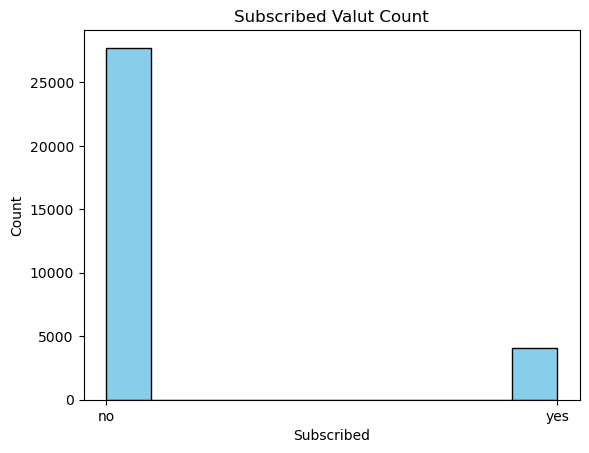

In [10]:
X_train, X_test, y_train, y_test = train_test_split(base_data.drop(['y'], axis = 1), base_data['y'],
                                                   random_state=442,
                                                   stratify = base_data['y'])

#plot the target column
plt.hist(base_data['y'],color='skyblue', edgecolor='black')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.title('Subscribed Valut Count')

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [11]:
baseline = base_data['y'].value_counts(normalize = True)[0]
print(baseline)

0.8711511876335303


**Analysis**  
Based on the above plot and the value count numbers, we can conclude that 87% of the customers didn't subscribe to the term deposit. In other words, if we build a model that only predict 'no', the model will have a score of 87%. Values of the target column is not evenly distributed. Our target should be to increase correct prediction for 'yes' value.  

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [12]:
lgr_pipe = Pipeline([('transformer', transformer),
                    ('lgr', LogisticRegression(max_iter = 1000))])
lgr_pipe.fit(X_train, y_train)
lgr_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week'])])),
                ('lgr', LogisticRegression(max_iter=1000))])

### Problem 9: Score the Model

What is the accuracy of your model?

['no' 'no' 'no' 'no' 'no']


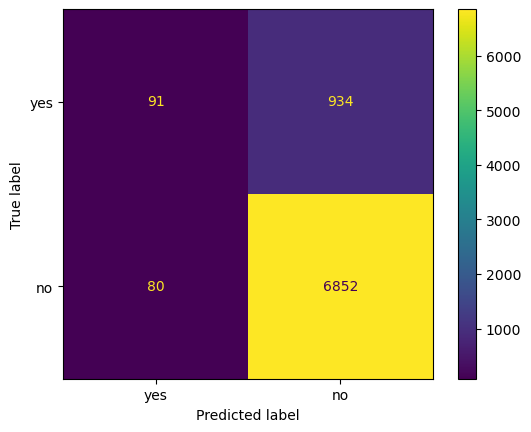

In [13]:
lgr_preds = lgr_pipe.predict(X_test)
print(lgr_preds[:5])
confusion_mat = confusion_matrix(y_test, lgr_preds, labels=['yes', 'no'])
#tn, fp, fn, tp = confusion_mat.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['yes', 'no'])
disp.plot()
plt.show()

In [14]:
pipe_acc = lgr_pipe.score(X_test, y_test)
print(pipe_acc)

0.8725650370742742


**Analysis**  
With the basic logistic regression model, we need to increase the prediction of the 'yes' label for the test data set. Now I want to compare it with KNeighborsClassifier. 

['no' 'no' 'no' 'no' 'no']


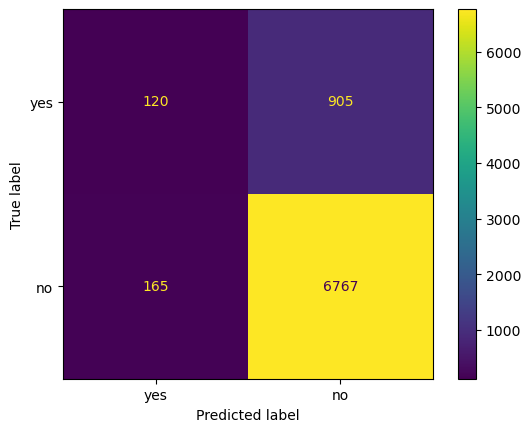

In [15]:
test_pipe = Pipeline([('transformer', transformer),
                    ('model', KNeighborsClassifier())])
test_pipe.fit(X_train, y_train)
preds = test_pipe.predict(X_test)
print(preds[:5])
confusion_mat = confusion_matrix(y_test, preds, labels=['yes', 'no'])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['yes', 'no'])
disp.plot()
plt.show()

In [16]:
pipe_acc = test_pipe.score(X_test, y_test)
print(pipe_acc)

0.8655272087470152


**Analysis**  
With KNeighborsClassifier, the score is down, but ture positive is increased, that means we can predict more 'yes' label.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

**Common function to evaluate the pipeline**   

In [17]:
def evaluate_pipeline(classifier, result, classifier_name):
    """
    Trains a pipeline and evaluates its performance.
    
    Parameters:
    - classifier: An instance of classifier.
    - result: result dataframe provided to append the result to
    - classifier_name: name of the classifier
    
    Returns:
    - training_time: The time taken to train the pipeline.
    - test_score: Accuracy of the pipeline on the test set.
    - train_score: Accuracy of the pipeline on the training set.
    - result: the evaluation result appended to the result dataframe
    """
    # Create the pipeline
    my_pipe = Pipeline([
        ('transform', transformer), 
        ('classifier', classifier)
    ])
    
    # Start timing
    start_time = time.time()
    
    # Fit the pipeline
    my_pipe.fit(X_train, y_train)
    
    # End timing
    end_time = time.time()
    
    # Calculate the training time
    training_time = end_time - start_time
    
    # Evaluate the pipeline
    test_score = my_pipe.score(X_test, y_test)
    train_score = my_pipe.score(X_train, y_train)
    
    row = pd.DataFrame([{'Model': classifier_name, 'Train Time': training_time, 'Train Accuracy':train_score, 'Test Accuracy':test_score}])
    result = pd.concat([result, row], ignore_index=True)
  
    #return training_time, test_score, train_score
    return result


**Run different classifiers with default parameters**

In [18]:
# create result dataframe
result = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

#run LogisticRegression
classifier = LogisticRegression(max_iter = 1000)
result = evaluate_pipeline(classifier, result, 'Logistic Regression')

#run KNeighborsClassifier
classifier = KNeighborsClassifier()
result = evaluate_pipeline(classifier, result, 'KNN')

#run Decision Tree
classifier = DecisionTreeClassifier(max_depth=None)
result = evaluate_pipeline(classifier, result, 'Decision Tree')

#run SVM
classifier = SVC()
result = evaluate_pipeline(classifier, result, 'SVC')

#run dummy classifier
classifier = DummyClassifier()
result = evaluate_pipeline(classifier, result, 'Dummy Classifier')


print(result)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.221819        0.870345       0.872565
1                  KNN    0.059897        0.886012       0.865527
2        Decision Tree    0.423109        0.925223       0.850697
3                  SVC   24.889906        0.878765       0.872691
4     Dummy Classifier    0.054279        0.871141       0.871183


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Hyperparameter tuning for KNN**

In [19]:
knn_pipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier())])

params = {'knn__n_neighbors': list(range(1, 21, 2))}
#params = {
#          'knn__weights': ['uniform', 'distance'],
#          'knn__p': [1, 2]}

#params = {'knn__n_neighbors': list(range(1, 22, 2))}
grid = GridSearchCV(knn_pipe, param_grid=params)
grid.fit(X_train, y_train)
#best_k = list(knn_grid.best_params_.values())[0]
#best_acc = knn_grid.score(X_test, y_test)

grid_train_acc = grid.score(X_train, y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_

print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters: {best_params}')

Training Accuracy:  0.87
Trest Accuracy:  0.87
Best parameters: {'knn__n_neighbors': 17}


**Hyperparameter tuning for Decision Tree**

In [21]:
tree_pipe = Pipeline([('transform', transformer), ('model', DecisionTreeClassifier())])
params = {'model__max_depth': [2,3, 4, 5, 8, 10],
         'model__min_samples_split': [0.01,0.05],
          'model__criterion': ["gini", "entropy"],
          'model__min_samples_leaf': [0.01, 0.05]
         }

grid = GridSearchCV(tree_pipe, param_grid=params)
grid.fit(X_train, y_train)

grid_train_acc = grid.score(X_train, y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_

print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters: {best_params}')

Training Accuracy:  0.87
Trest Accuracy:  0.87
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 0.01, 'model__min_samples_split': 0.05}


**Hyperparameter tuning for SVC**  
This tuning is very time cosuming, so I actually run with different kernal for few times

In [ ]:
svc_pipe = Pipeline([('transform', transformer), ('model', SVC())])
params = {'model__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'model__gamma': [0.1, 1.0, 10.0, 100.0],}

grid = GridSearchCV(svc_pipe, param_grid=params)
grid.fit(X_train, y_train)

grid_train_acc = grid.score(X_train, y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_

print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters: {best_params}')

**Run with optimized Hyperparameter** 

In [22]:
# create result dataframe
result = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

#run LogisticRegression
classifier = LogisticRegression(max_iter = 1000)
result = evaluate_pipeline(classifier, result, 'Logistic Regression')

#run KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17, weights='uniform', p=1 )
result = evaluate_pipeline(classifier, result, 'KNN')

#run Decision Tree
classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=0.01, min_samples_split=0.05 )
result = evaluate_pipeline(classifier, result, 'Decision Tree')

#run SVM
classifier = SVC(kernel='linear', gamma=0.1)
result = evaluate_pipeline(classifier, result, 'SVC')

#run dummy classifier
classifier = DummyClassifier()
result = evaluate_pipeline(classifier, result, 'Dummy Classifier')


print(result)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.220458        0.870345       0.872565
1                  KNN    0.061464        0.874115       0.869926
2        Decision Tree    0.070731        0.871602       0.872691
3                  SVC    8.119629        0.871266       0.872188
4     Dummy Classifier    0.058354        0.871141       0.871183


In [23]:
#run SVC with rbf kernel
result = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
#classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=0.01, min_samples_split=0.01 )
classifier = SVC(kernel='rbf', gamma=0.1)
result = evaluate_pipeline(classifier, result, 'Decision Tree')

print(result)

           Model  Train Time  Train Accuracy  Test Accuracy
0  Decision Tree   25.344451        0.873068       0.873319


**Analysis**  
After cross compare of the training time and the score, the best model to choose is: **decision tree**  
But, we would also like to check the Confusion Matrices for each model:

**Confusion Matrices for KNeighborsClassifier**

['no' 'no' 'no' 'no' 'no']


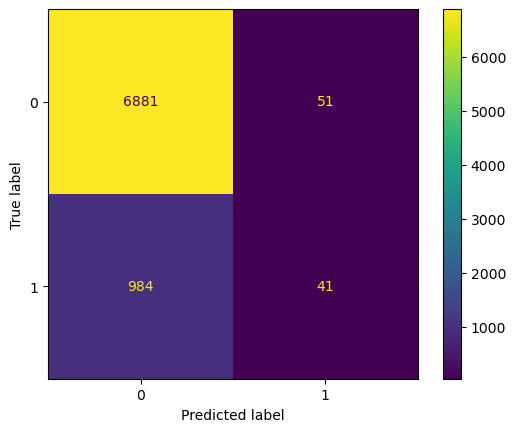

In [25]:
test_pipe = Pipeline([('transformer', transformer),
                    ('model', KNeighborsClassifier(n_neighbors=17, weights='uniform', p=1))])
test_pipe.fit(X_train, y_train)
preds = test_pipe.predict(X_test)
print(preds[:5])
confusion_mat = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.show()

**Confusion Matrices for DecisionTreeClassifier**

['no' 'no' 'no' 'no' 'no']


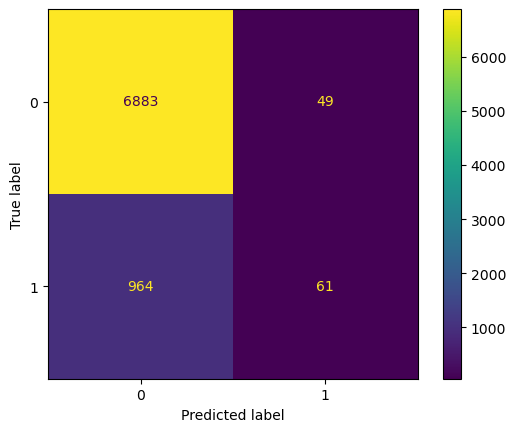

In [36]:
test_pipe = Pipeline([('transformer', transformer),
                    ('model', DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=0.01, min_samples_split=0.05 ))])
test_pipe.fit(X_train, y_train)
preds = test_pipe.predict(X_test)
print(preds[:5])
confusion_mat = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.show()

**Confusion Matrices for SVC**

['no' 'no' 'no' 'no' 'no']


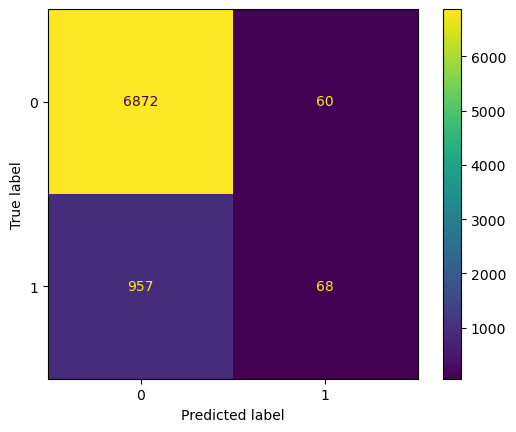

In [27]:
test_pipe = Pipeline([('transformer', transformer),
                    ('model', SVC(kernel='linear', gamma=0.1))])
test_pipe.fit(X_train, y_train)
preds = test_pipe.predict(X_test)
print(preds[:5])
confusion_mat = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.show()

**Analysis**  
After compared the Confusion Matrices, the best model to choose is: **Decision Tree** since we are able to target the 'yes' labeled customers.But if we don't consider training time, we should choose **SVC**

Next I want to add more columns

In [37]:
base_data_2 = df.copy()
#define column names
categorical_cols = ['job','marital','education','default', 'housing', 'loan', 'contact','month','day_of_week','poutcome'] 
result_col = ['y']
number_cols = ['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','duration','campaign','pdays']
all_cols = categorical_cols + result_col + number_cols

base_data_2 = base_data_2[all_cols]
#base_data_2['previous'] = base_data_2['previous'].astype(float)
#base_data[all_cols] = base_data[all_cols].astype('string')

#use all columns 
base_data_2 = base_data_2.replace({'default': {'unknown':np.nan}})   
base_data_2 = base_data_2.replace({'housing': {'unknown':np.nan}}) 
base_data_2 = base_data_2.replace({'loan': {'unknown':np.nan}})
base_data_2 = base_data_2.dropna()
print(f"shape after replace: {base_data_2.shape}")

shape after replace: (31828, 20)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [39]:
base_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31828 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             31828 non-null  object 
 1   marital         31828 non-null  object 
 2   education       31828 non-null  object 
 3   default         31828 non-null  object 
 4   housing         31828 non-null  object 
 5   loan            31828 non-null  object 
 6   contact         31828 non-null  object 
 7   month           31828 non-null  object 
 8   day_of_week     31828 non-null  object 
 9   poutcome        31828 non-null  object 
 10  y               31828 non-null  object 
 11  age             31828 non-null  int64  
 12  emp.var.rate    31828 non-null  float64
 13  cons.price.idx  31828 non-null  float64
 14  cons.conf.idx   31828 non-null  float64
 15  euribor3m       31828 non-null  float64
 16  nr.employed     31828 non-null  float64
 17  duration        31828 non-null  int6

Text(0.5, 1.0, 'Subscribed Valut Count')

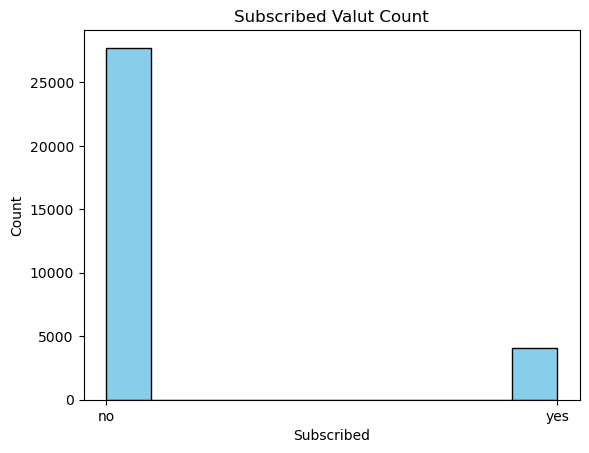

In [40]:
#define a column transformer
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), categorical_cols),
                                     remainder = StandardScaler())

X_train, X_test, y_train, y_test = train_test_split(base_data_2.drop(['y'], axis = 1), base_data_2['y'],
                                                   random_state=443,
                                                   stratify = base_data_2['y'])

#plot the target column
plt.hist(base_data_2['y'],color='skyblue', edgecolor='black')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.title('Subscribed Valut Count')

**Run SVC**

['no' 'no' 'no' 'no' 'no']


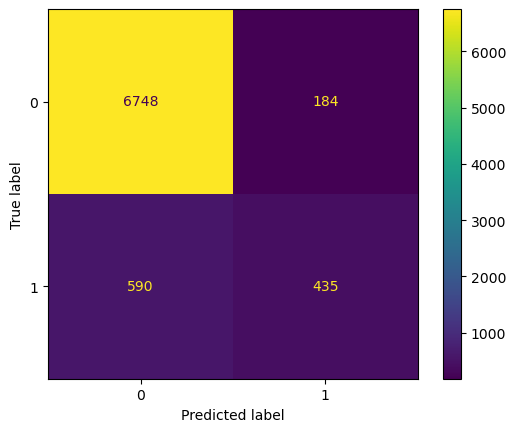

In [41]:
test_pipe = Pipeline([('transformer', transformer),
                    ('model', SVC(kernel='rbf', gamma=0.1))])
test_pipe.fit(X_train, y_train)
preds = test_pipe.predict(X_test)
print(preds[:5])
confusion_mat = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.show()

In [42]:
test_score = test_pipe.score(X_test, y_test)
train_score = test_pipe.score(X_train, y_train)
print(f"test score {test_score}")
print(f"train score {train_score}")


test score 0.9027271584768128
train score 0.9209082149888986


**Run Decision Tree**

['no' 'no' 'no' 'no' 'no']


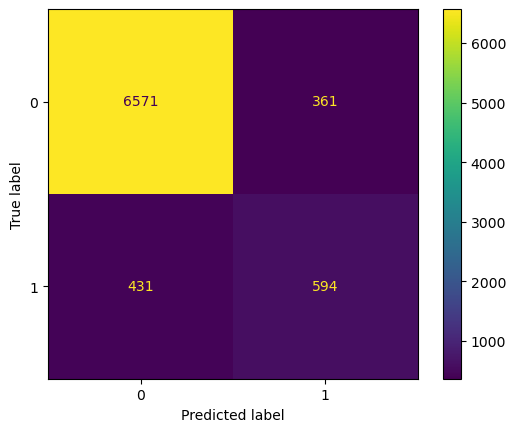

In [44]:
test_pipe = Pipeline([('transformer', transformer),
                    ('model', DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=0.01, min_samples_split=0.01 ))])
test_pipe.fit(X_train, y_train)
preds = test_pipe.predict(X_test)
print(preds[:5])
confusion_mat = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.show()

In [45]:
test_score = test_pipe.score(X_test, y_test)
train_score = test_pipe.score(X_train, y_train)
print(f"test score {test_score}")
print(f"train score {train_score}")

test score 0.9004649993716225
train score 0.8956893301495539


### Conclusion
Based on above analysis, the best model to choose is Decision Tree with more features than just bank client data.  

### Next Steps and Recommandations
Next step, we can use numberic features to re-run the process and compare the confusion matrices. The conclusion may lead to a different model selection.

##### Questions